**Clustering Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = "/content/EastWestAirlines.xlsx"
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse("data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


**1.Data Preprocessing**

In [ ]:
#Drop ID# Column
df_clean = df.drop(columns=['ID#'])

In [ ]:
#Check Missing Values
print("Missing Values:\n", df_clean.isnull().sum())

Missing Values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [ ]:
#Remove outliers using z-score method
z_score  = zscore(df_clean.drop(columns=['Award?']))
abs_z_score = abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
df_no_outliers = df_clean[filtered_entries]
print(f"Original Shape: {df_clean.shape}")
print(f"Shape After Removing Outliers: {df_no_outliers.shape}")

Original Shape: (3999, 11)
Shape After Removing Outliers: (3630, 11)


In [ ]:
#Scale the features
features = df_no_outliers.drop(columns=['Award?'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
print(df_scaled.head())

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.523260   -0.158869  -0.755664        0.0        0.0    -0.779029   
1 -0.667084   -0.158869  -0.755664        0.0        0.0    -0.776768   
2 -0.309747   -0.158869  -0.755664        0.0        0.0    -0.561235   
3 -0.739295   -0.158869  -0.755664        0.0        0.0    -0.761050   
4  0.601746   -0.158869   1.517591        0.0        0.0     1.599448   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0    -1.147142          -0.401822        -0.431775           1.431438  
1    -1.025933          -0.401822        -0.431775           1.415848  
2    -0.783516          -0.401822        -0.431775           1.448002  
3    -1.147142          -0.401822        -0.431775           1.408053  
4     1.883076           2.859455         1.768005           1.399771  


**2.EDA**

In [ ]:
print(df_no_outliers.describe())

             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000           0.000000         0.0

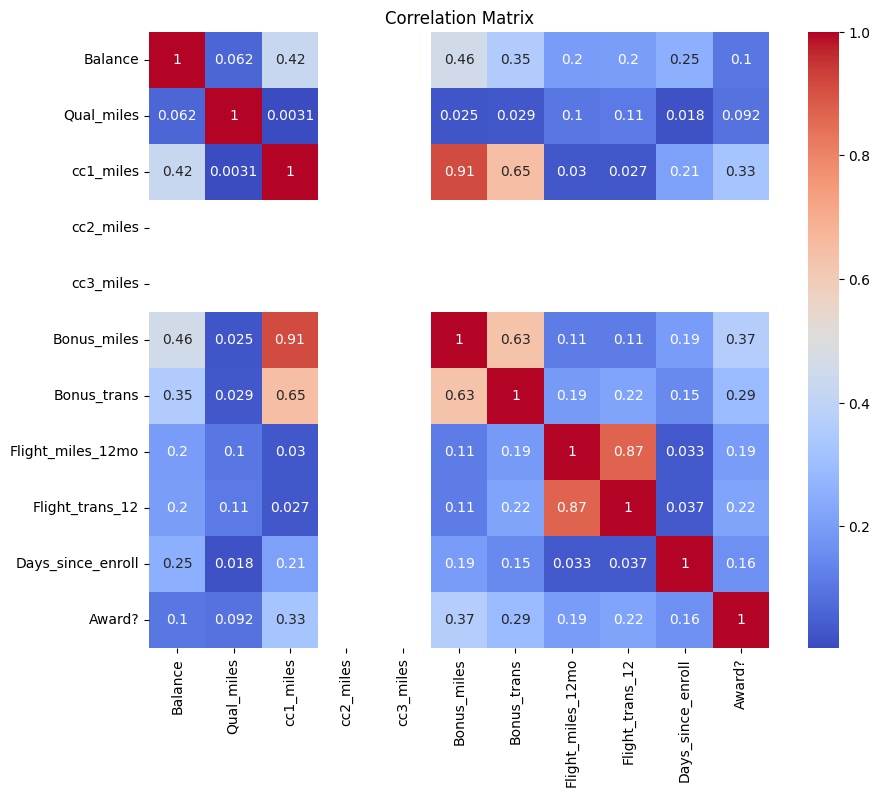

In [ ]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**3.Visualization**

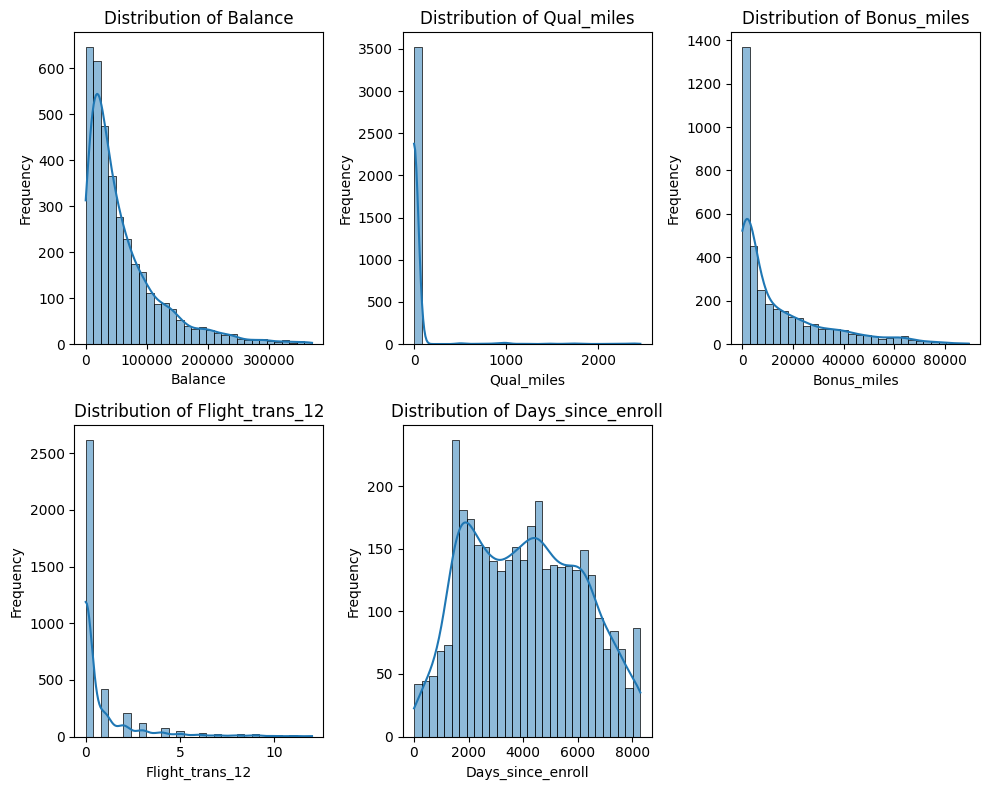

In [ ]:
cols=['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_trans_12', 'Days_since_enroll']
plt.figure(figsize=(10, 8))
for i, col in enumerate(cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(df_no_outliers[col], kde=True, bins=30)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**4.Implementing Clustering Algorithms**

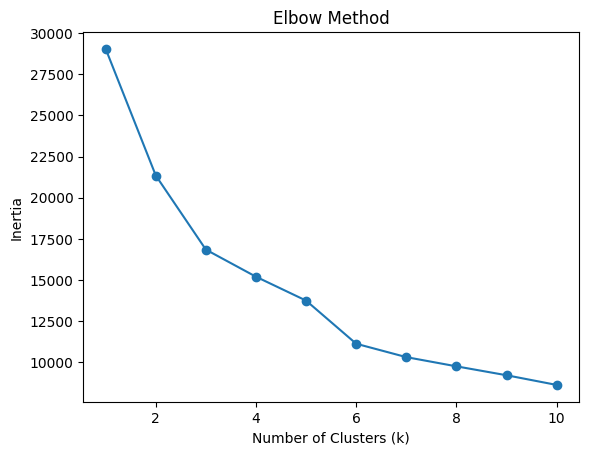

In [ ]:
#K_Means Clustering
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
  inertia.append(KMeans(n_clusters=k, random_state=42).fit(df_scaled).inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


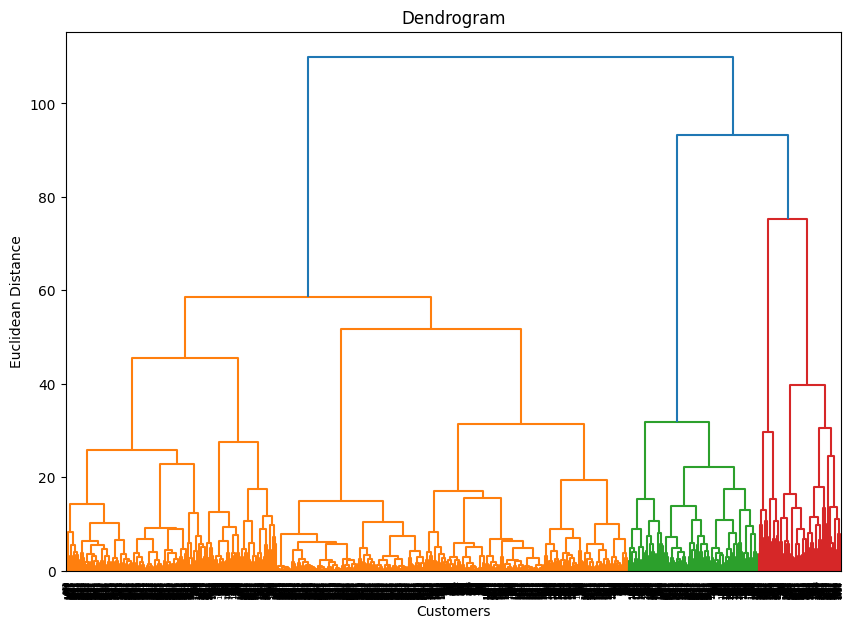

In [ ]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled)

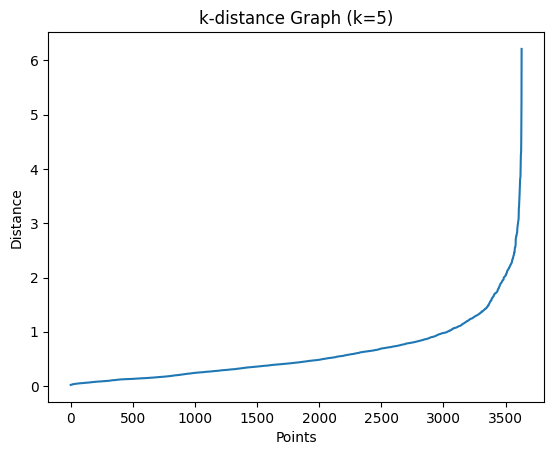

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5).fit(df_scaled)
distances = np.sort(nn.kneighbors(df_scaled)[0][:, 4])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('k-distance Graph (k=5)')

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

**5.Cluster Analysis and Interpretation**

In [ ]:
#Add cluster labels for Interpretation
df_no_outliers['KMeans_Cluster'] = kmeans_labels
df_no_outliers['HC_Cluster'] = hc_labels
df_no_outliers['DBSCAN_Cluster'] = dbscan_labels


In [ ]:
#Characteristics of clusters
print(df_no_outliers.groupby('KMeans_Cluster').mean())
print(df_no_outliers.groupby('HC_Cluster').mean())
print(df_no_outliers.groupby('DBSCAN_Cluster').mean())

                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               36755.204007   29.862933   1.146175        1.0        1.0   
1               97897.225410  157.127049   2.020492        1.0        1.0   
2               96709.280672   33.423529   3.563025        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                3663.948087     6.030965          98.770036         0.352914   
1               19236.081967    16.110656        2217.303279         6.274590   
2               32912.934454    17.487395         143.716807         0.457143   

                Days_since_enroll    Award?  HC_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                                           
0                     3666.077869  0.220401    0.096084     

Interpretation and Insights

1.K-Means Clusters:

* Cluster 0: Low balance and low bonus miles — likely new or inactive flyers.
- Cluster 1: Very high balance and bonus miles — probably premium or loyal customers.
- Cluster 2: Medium balance and moderate activity — casual flyers.
- Cluster 3: Low flight miles but long enrollment — dormant users or infrequent travelers.

2.Hierarchical Clustering:
- Similar trends to K-Means, but some overlap in moderate groups — good for visual dendrogram-based analysis.

3.DBSCAN:
- Identified outliers (label -1 as noise).
- Formed dense groups with meaningful separation — suitable for detecting anomalies or tightly packed clusters.

**6.Visualization**

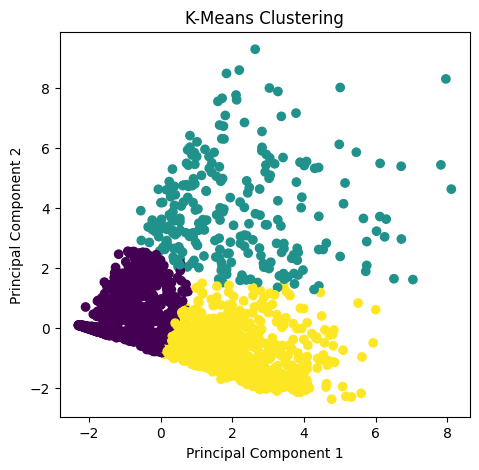

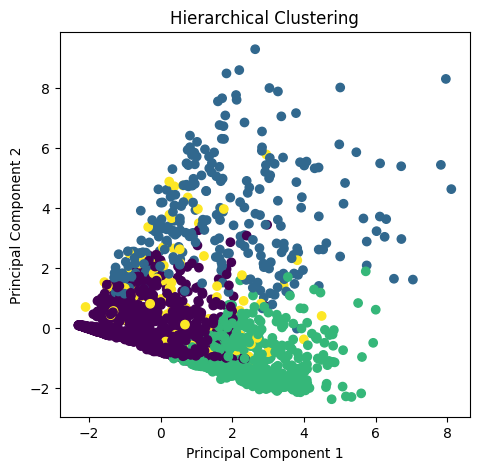

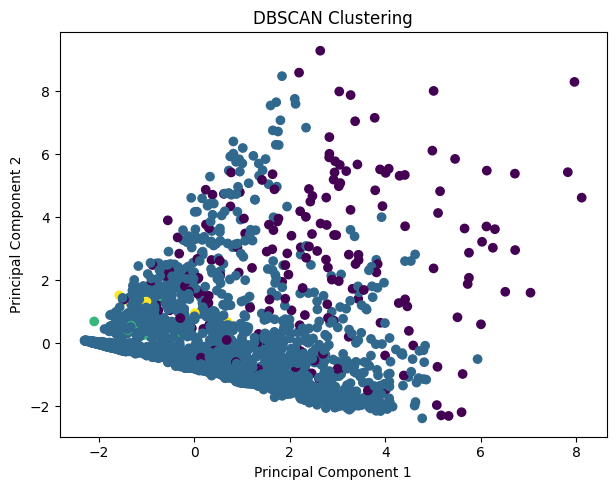

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(18, 5))

#K-Means Plot
plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

#Hierarchical Clustering Plot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hc_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.show()

#DBSCAN Clustering
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

**7.Evaluation and Performance Metrics**

In [ ]:
from sklearn.metrics import silhouette_score
print("K-Means Silhouette Score:", silhouette_score(df_scaled, kmeans_labels))
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
  print("DBSCAN Silhouette Score:", silhouette_score(df_scaled[mask], dbscan_labels[mask]))
else:
  print("DBSCAN Silhouette Score: No noise points found.")

K-Means Silhouette Score: 0.3504137590806388
DBSCAN Silhouette Score: 0.32237592844924756
